In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import platform
from IPython.display import Image

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "14"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 700)
pd.set_option("precision", 2)

In [2]:
[f for f in os.listdir() if '.pickle' in str(f)]

['MC MinCost results.pickle',
 'MC MinGHG results.pickle',
 'MC MinGHG-SO results.pickle',
 'MC MinCost-SO results.pickle',
 'MC MinGHG-NoGC-AnF results.pickle',
 'MC MinGHG-NoGC-AnF-SO results.pickle']

In [3]:
files = [
    'MC MinGHG results.pickle',
    'MC MinGHG-SO results.pickle',
    'MC MinGHG-NoGC-AnF results.pickle',
    'MC MinGHG-NoGC-AnF-SO results.pickle',
    'MC MinCost results.pickle',
    'MC MinCost-SO results.pickle']

In [4]:
for f in files:
    print(f[3:-15])

MinGHG
MinGHG-SO
MinGHG-NoGC-AnF
MinGHG-NoGC-AnF-SO
MinCost
MinCost-SO


In [5]:
scenario_dict = {
'MinGHG': 'MinGHG',
'MinGHG-SO':'MinGHG-SO',
'MinGHG-NoGC-AnF':'MinGHG-NoGC&AnF',
'MinGHG-NoGC-AnF-SO':'MinGHG-NoGC&AnF-SO',
'MinCost':'MinCost',
'MinCost-SO':'MinCost-SO'}

In [6]:
TotCost_Method = ('SwolfPy_Total_Cost', 'SwolfPy')
OptCost_Method = ('SwolfPy_Operational_Cost', 'SwolfPy')
CapCost_Method = ('SwolfPy_Capital_Cost', 'SwolfPy')
GWP_Method = ('IPCC 2013, Ecoinvent V3.5', 'climate change', 'GWP 100a, bioCO2=1, C1_36')
CED_Method = ('cumulative energy demand', 'fossil', 'non-renewable energy resources, fossil')
ACID_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'acidification')
ETP_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'eutrophication')
SMOG_Method = ('TRACI (2.1) SwolfPy', 'environmental impact', 'photochemical smog')
ETOX_Method = ('USEtox (obsolete)', 'ecotoxicity', 'total')
HTOX_Method = ('USEtox (obsolete)', 'human toxicity', 'total')

methods = [TotCost_Method, OptCost_Method, CapCost_Method, GWP_Method,
           CED_Method, ACID_Method, ETP_Method, SMOG_Method, ETOX_Method,
           HTOX_Method]

methods_main = [TotCost_Method, GWP_Method,
           CED_Method, ACID_Method, ETP_Method, SMOG_Method, ETOX_Method,
           HTOX_Method]


GWP = pd.DataFrame(index=range(5000))
Cost = pd.DataFrame(index=range(5000))
CED = pd.DataFrame(index=range(5000))
ACID = pd.DataFrame(index=range(5000))
ETP = pd.DataFrame(index=range(5000))
SMOG = pd.DataFrame(index=range(5000))
ETOX = pd.DataFrame(index=range(5000))
HTOX = pd.DataFrame(index=range(5000))

for f in files:
    data = pd.read_pickle(f)
    col_name = f[3:-15]
    GWP[col_name] = data[[GWP_Method]]/461395.22
    Cost[col_name] = data[[TotCost_Method]]/461395.22
    CED[col_name] = data[[CED_Method]]/461395.22
    ACID[col_name] = data[[ACID_Method]]/461395.22
    ETP[col_name] = data[[ETP_Method]]/461395.22
    SMOG[col_name] = data[[SMOG_Method]]/461395.22
    ETOX[col_name] = data[[ETOX_Method]]/461395.22
    HTOX[col_name] = data[[HTOX_Method]]/461395.22

In [7]:
def add_median_bxplot(ax, df, x_offset=0):
    for tick in ax.get_xticklabels():
        ax.text(tick._x - x_offset,
                df[tick.get_text()].median(),
                round(df[tick.get_text()].median()),
                horizontalalignment='center',
                color='w',
                size=14,
                weight='semibold',
                bbox=dict(facecolor='#445A64'))

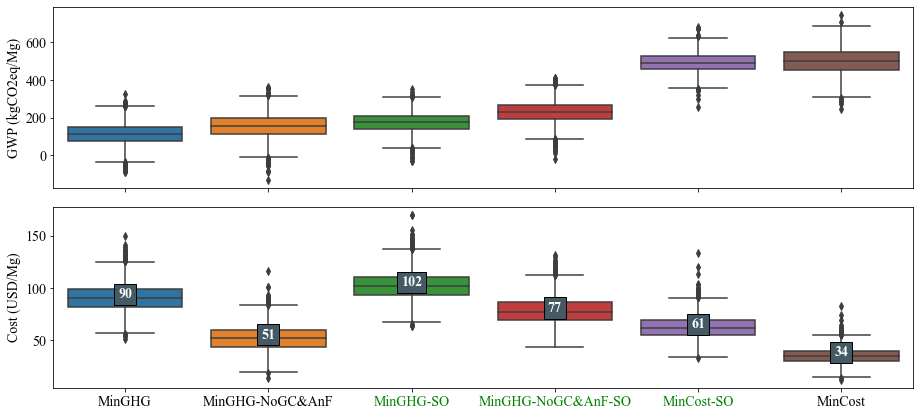

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 6), sharex=True)

order_by_GWP = GWP.describe().T.sort_values(by='50%').index

sns.boxplot(data=GWP[order_by_GWP], ax=ax1, width=0.8)
ax1.set_ylabel('GWP (kgCO2eq/Mg)')
add_median_bxplot(ax1, GWP)

sns.boxplot(data=Cost[order_by_GWP], ax=ax2, width=0.8)
ax2.set_ylabel('Cost (USD/Mg)')
add_median_bxplot(ax2, Cost)

ax2.xaxis.set_ticklabels([scenario_dict[l] for l in order_by_GWP])


for t in ax2.xaxis.get_ticklabels():
    if 'SO' in t.get_text():
        t.set_color('green')

fig.tight_layout()

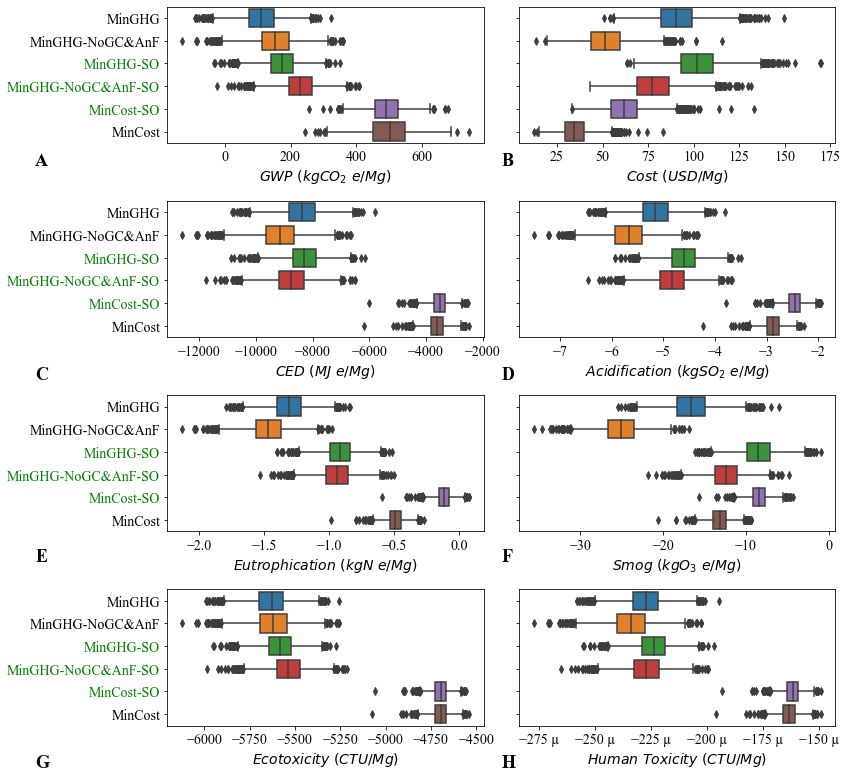

In [9]:
fig, axes = plt.subplots(4, 2, figsize=(12, 11), sharey=True)

order_by_GWP = GWP.describe().T.sort_values(by='50%').index

sns.boxplot(data=GWP[order_by_GWP], ax=axes[0][0], width=0.8, orient='h')
axes[0][0].set_xlabel(r'$GWP\ (kgCO_2\ e/Mg)$')

sns.boxplot(data=Cost[order_by_GWP], ax=axes[0][1], width=0.8, orient='h')
axes[0][1].set_xlabel(r'$Cost\ (USD/Mg)$')

sns.boxplot(data=CED[order_by_GWP], ax=axes[1][0], width=0.8, orient='h')
axes[1][0].set_xlabel(r'$CED\ (MJ\ e/Mg)$')

sns.boxplot(data=ACID[order_by_GWP], ax=axes[1][1], width=0.8, orient='h')
axes[1][1].set_xlabel(r'$Acidification\ (kgSO_2\ e/Mg)$')

sns.boxplot(data=ETP[order_by_GWP], ax=axes[2][0], width=0.8, orient='h')
axes[2][0].set_xlabel(r'$Eutrophication\ (kgN\ e/Mg)$')

sns.boxplot(data=SMOG[order_by_GWP], ax=axes[2][1], width=0.8, orient='h')
axes[2][1].set_xlabel(r'$Smog\ (kgO_3\ e/Mg)$')

sns.boxplot(data=ETOX[order_by_GWP], ax=axes[3][0], width=0.8, orient='h')
axes[3][0].set_xlabel(r'$Ecotoxicity\ (CTU/Mg)$')


sns.boxplot(data=HTOX[order_by_GWP], ax=axes[3][1], width=0.8, orient='h')
axes[3][1].set_xlabel(r'$Human\ Toxicity\ (CTU/Mg)$')
axes[0][0].yaxis.set_ticklabels([scenario_dict[l] for l in order_by_GWP])

from matplotlib import ticker
axes[3][1].xaxis.set_major_formatter(ticker.EngFormatter())


fig.text(0.05, 0.78, 'A', weight='bold', size=18)
fig.text(0.59, 0.78, 'B', weight='bold', size=18)

fig.text(0.05, 0.51, 'C', weight='bold', size=18)
fig.text(0.59, 0.51, 'D', weight='bold', size=18)

fig.text(0.05, 0.28, 'E', weight='bold', size=18)
fig.text(0.59, 0.28, 'F', weight='bold', size=18)

fig.text(0.05, 0.02, 'G', weight='bold', size=18)
fig.text(0.59, 0.02, 'H', weight='bold', size=18)

for i in range(4):
    for t in axes[i][0].yaxis.get_ticklabels():
        if 'SO' in t.get_text():
            t.set_color('green')

fig.tight_layout()
fig.savefig('MC - ranking all impacts.png', dpi=300)

### Ranking based on median

,MinGHG,MinGHG-NoGC-AnF,MinGHG-SO,MinGHG-NoGC-AnF-SO,MinCost-SO,MinCost
GWP,1.0,2.0,3.0,4.0,5.0,5.0
Cost,5.0,2.0,6.0,4.0,3.0,1.0
CED,1.0,1.0,1.0,1.0,5.0,5.0
ACID,2.0,1.0,2.0,2.0,6.0,5.0
ETP,2.0,1.0,3.0,3.0,6.0,5.0
SMOG,2.0,1.0,5.0,3.0,5.0,3.0
HTOX,1.0,1.0,1.0,1.0,5.0,5.0
ETOX,1.0,1.0,1.0,1.0,5.0,5.0


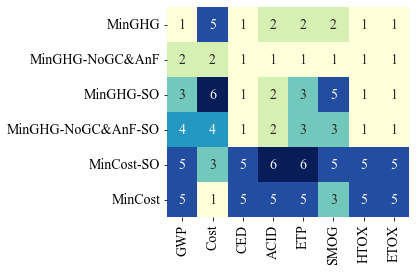

In [25]:
ranks = pd.DataFrame(columns=['MinGHG', 'MinGHG-NoGC-AnF', 'MinGHG-SO',
                              'MinGHG-NoGC-AnF-SO', 'MinCost-SO', 'MinCost'], dtype=int)

for cat, df in {'GWP': GWP,
               'Cost': Cost,
               'CED': CED,
               'ACID': ACID,
               'ETP': ETP,
               'SMOG': SMOG,
               'HTOX': HTOX,
               'ETOX': ETOX}.items():
    rnk = 1
    prvs = - np.inf
    k = 1
    for i, j in df.describe().T.sort_values(by='50%')['50%'].items():
        if abs((j - prvs)/max(j, prvs)) < 0.1:
            ranks.loc[cat, i] = rnk
        else:
            rnk = k
            ranks.loc[cat, i] = k
        prvs=j
        k += 1

fig, ax= plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(ranks.T, ax=ax, cmap="YlGnBu", annot=True, fmt=".0f", annot_kws={"size": 14}, cbar=False)

ax.yaxis.set_ticklabels([scenario_dict[l] for l in ranks.columns])

ax.tick_params(axis='x', rotation=90)

fig.tight_layout()
fig.savefig('MC_Heatmap-ranking -median.png', dpi=300)

ranks

In [24]:
ranks.to_clipboard()

In [19]:
ranks.mean()

MinGHG                1.88
MinGHG-NoGC-AnF       1.25
MinGHG-SO             2.75
MinGHG-NoGC-AnF-SO    2.38
MinCost-SO            5.00
MinCost               4.25
dtype: float64

### Ranking based on average

,MinGHG,MinGHG-NoGC-AnF,MinGHG-SO,MinGHG-NoGC-AnF-SO,MinCost-SO,MinCost
GWP,1.0,2.0,3.0,4.0,5.0,5.0
Cost,5.0,2.0,6.0,4.0,3.0,1.0
CED,1.0,1.0,1.0,1.0,5.0,5.0
ACID,1.0,1.0,1.0,1.0,6.0,5.0
ETP,2.0,1.0,3.0,3.0,6.0,5.0
SMOG,2.0,1.0,5.0,3.0,5.0,3.0
HTOX,1.0,1.0,1.0,1.0,5.0,5.0
ETOX,1.0,1.0,1.0,1.0,5.0,5.0


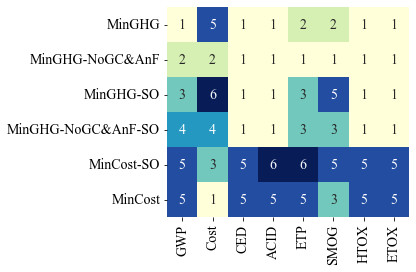

In [21]:
ranks = pd.DataFrame(columns=['MinGHG', 'MinGHG-NoGC-AnF', 'MinGHG-SO',
                              'MinGHG-NoGC-AnF-SO', 'MinCost-SO', 'MinCost'], dtype=int)

for cat, df in {'GWP': GWP,
               'Cost': Cost,
               'CED': CED,
               'ACID': ACID,
               'ETP': ETP,
               'SMOG': SMOG,
               'HTOX': HTOX,
               'ETOX': ETOX}.items():
    rnk = 1
    prvs = - np.inf
    k = 1
    for i, j in df.describe().T.sort_values(by='mean')['mean'].items():
        if abs((j - prvs)/max(j, prvs)) < 0.1:
            ranks.loc[cat, i] = rnk
        else:
            rnk = k
            ranks.loc[cat, i] = k
        prvs=j
        k += 1

fig, ax= plt.subplots(1, 1, figsize=(6, 4))
sns.heatmap(ranks.T, ax=ax, cmap="YlGnBu", annot=True, fmt=".0f", annot_kws={"size": 14}, cbar=False)
ax.yaxis.set_ticklabels([scenario_dict[l] for l in ranks.columns])


ax.tick_params(axis='x', rotation=90)
fig.tight_layout()
fig.savefig('MC_Heatmap-ranking - mean.png', dpi=300)

ranks

In [13]:
Imprnt_params = set()
corr_dict = {}
for f in files:
    data = pd.read_pickle(f)
    corr_data = data.corr(method='spearman')
    corr_data.drop(axis=0, index=methods, inplace=True)
    corr_dict[f[3:-15]] = corr_data
    for m in methods_main:
        corr_data.sort_values(
            by=m,
            key=lambda col: abs(col),
            ascending=False, inplace=True)
        for i, j in corr_data[m][:40].items():
            if abs(j) > 0.2:
                Imprnt_params.add(i)

In [14]:
Imprnt_params

{('Gasification Syngas Combustion', 'Economic_params', 'O&M_cost'),
 ('Gasification Syngas Combustion', 'Economic_params', 'capital_cost'),
 ('Gasification Syngas Combustion', 'Energy', 'elec_gen_eff_HP'),
 ('Gasification Syngas Combustion', 'Energy', 'frac_lhv_internal_elec'),
 ('LF', 'Energy_Rec', 'convEff'),
 ('LF', 'Landfill Gas Parameters', 'actk'),
 ('LF', 'Landfill Gas Parameters', 'intColEff'),
 ('LF', 'Landfill operation parameteres', 'annWaste'),
 ('LF', 'Landfill operation parameteres', 'optime'),
 ('RDF', 'Equipment:Rolling Stock', 'diesel_use'),
 ('Reproc', 'Al', ('Technosphere', 'Electricity_production')),
 ('Reproc', 'Mixed_Paper', ('Technosphere', 'Electricity_production')),
 ('SF', 'LCC', 'Pt'),
 ('SF', 'LCC', 'Wd'),
 ('SF', 'LCC', 'c'),
 ('SF', 'Speed', 'Vbet'),
 ('SF', 'TL', 'RWC'),
 ('SF', 'TL', 'SSR'),
 ('SF_MRF', 'Equipment:Rolling Stock', 'diesel_use'),
 ('WTE', 'Economic_parameters', 'Capital_cost'),
 ('WTE', 'Economic_parameters', 'O_M_cost'),
 ('WTE', 'Elec_Pr

In [15]:
param_dict = {
('Gasification Syngas Combustion', 'Economic_params', 'O&M_cost'): "GC: O&M cost",
('Gasification Syngas Combustion', 'Economic_params', 'capital_cost'): "GC: Capital cost",
('Gasification Syngas Combustion', 'Energy', 'elec_gen_eff_HP'): "GC: Gross elec. prod. eff. from HP steam",
('Gasification Syngas Combustion', 'Energy', 'frac_lhv_internal_elec'): "GC: Internal elec. use fraction",
('LF', 'Energy_Rec', 'convEff'): "LF: Elec. prod. eff. from LFG",
('LF', 'Landfill Gas Parameters', 'actk'): "LF: Bulk decay rate",
('LF', 'Landfill Gas Parameters', 'intColEff'): "LF: LFG col. eff. under intermediate cover",
('LF', 'Landfill operation parameteres', 'annWaste'): "LF: Annual waste acceptance rate",
('LF', 'Landfill operation parameteres', 'optime'): "LF: Landfill Operation time",
('RDF', 'Equipment:Rolling Stock', 'diesel_use'): "RDF: Rolling stock diesel use",
('Reproc', 'Al', ('Technosphere', 'Electricity_production')): "Reproc: Elec. offsets for Al recycling",
('Reproc', 'Mixed_Paper', ('Technosphere', 'Electricity_production')): "Reproc: Elec. offsets for paper recycling",
('SF', 'LCC', 'Pt'): "SF: Price of colection vehicle",
('SF', 'LCC', 'Wd'): "SF: Hourly wage for a driver",
('SF', 'LCC', 'c'): "SF: O&M cost of collection vehicle",
('SF', 'Speed', 'Vbet'): "SF: Speed Between collection stops",
('SF', 'TL', 'RWC'): "SF: Loading time at one RWC service stop",
('SF', 'TL', 'SSR'): "SF: Loading time at one SSR service stop",
('SF_MRF', 'Equipment:Rolling Stock', 'diesel_use'): "SS_MRF: Rolling stock diesel use",
('WTE', 'Economic_parameters', 'Capital_cost'): "WTE: Capital cost",
('WTE', 'Economic_parameters', 'O_M_cost'): "WTE: O&M cost",
('WTE', 'Elec_Prod_Eff', 'Gross_Efficiency'): "WTE: Gross Elec. prod. eff."}


impact_dict = {
    TotCost_Method: 'Cost',
    GWP_Method: 'GWP',
    CED_Method: 'CED',
    ACID_Method: 'ACID',
    ETP_Method: 'ETP',
    SMOG_Method: 'SMOG',
    ETOX_Method: 'ETOX',
    HTOX_Method: 'HTOX'
}

In [16]:
Corr_Params_dict = {}
index = list(Imprnt_params)
index.sort()
for m in methods_main:
    Corr_Params_dict[m] = pd.DataFrame(index=index, columns=corr_dict.keys(), dtype=float)
    for k, v in corr_dict.items():
        for param in Imprnt_params:
            if param in v.index:
                Corr_Params_dict[m].loc[[param], k] = v.loc[[param], [m]].values[0][0]
            else:
                Corr_Params_dict[m].loc[[param], k] = 0.0

c:\users\msardar2\.conda\envs\dev\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


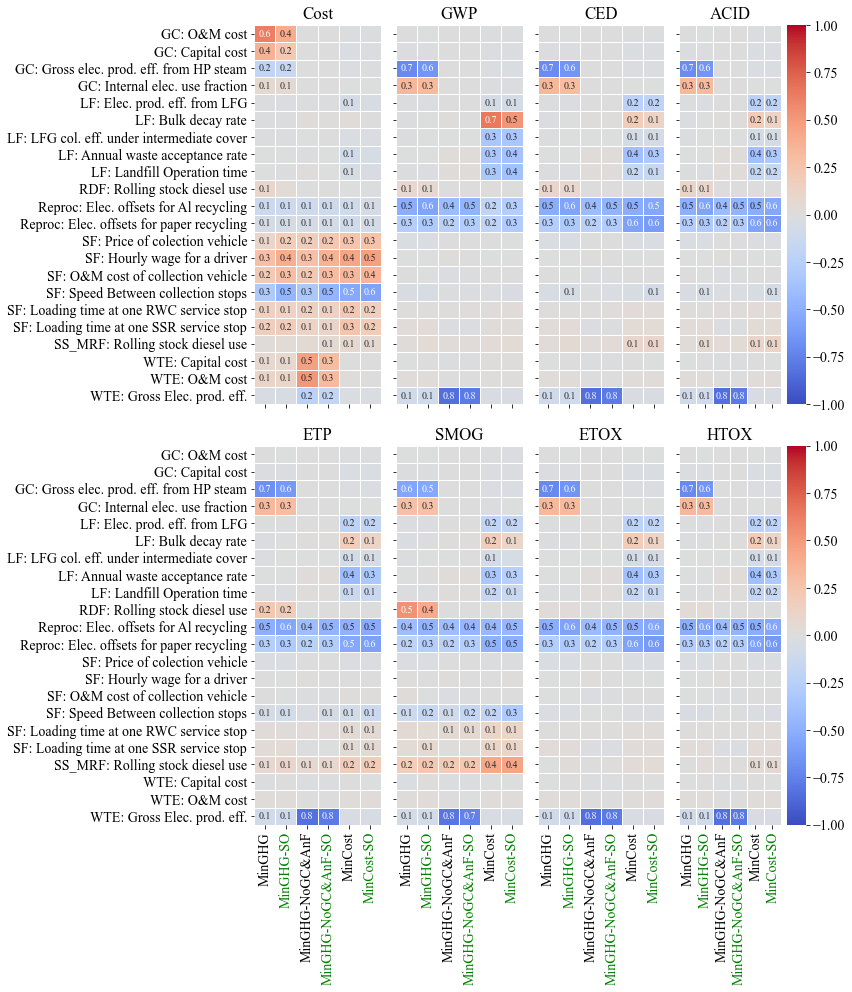

In [17]:
fig, axes_= plt.subplots(2, 4, figsize=(12, 14), sharey=True, sharex=True)

axes=[]
for i in axes_:
    for j in i:
        axes.append(j)

for i, m in enumerate(methods_main):
    if i == 7 or i ==3:
        sns.heatmap(Corr_Params_dict[m], cmap='coolwarm', ax=axes[i], vmin=-1, vmax=1,
            cbar=True, linewidths=1, linecolor='w', annot=True, fmt=".1f", annot_kws={"size": 10})
    else:
        sns.heatmap(Corr_Params_dict[m], cmap='coolwarm', ax=axes[i], vmin=-1, vmax=1,
                    cbar=False, linewidths=1, linecolor='w', annot=True, fmt=".1f", annot_kws={"size": 10})
    for t in axes[i].texts:
        val = eval(t.get_text())
        if val == 0.0:
            t.set_text('')
        else:
            t.set_text(str(abs(val)))
    axes[i].set_title(impact_dict[m])
    for t in axes[i].xaxis.get_ticklabels():
        if 'SO' in t.get_text():
            t.set_color('green')

tick_labels = []
for x in Corr_Params_dict[m].index:
    if x in param_dict:
        tick_labels.append(param_dict[x])
    else:
        tick_labels.append(x)
        
axes[0].yaxis.set_ticklabels(tick_labels)

axes[7].xaxis.set_ticklabels([scenario_dict[l] for l in Corr_Params_dict[m].columns])

fig.tight_layout()
fig.savefig('MC_Cor_res.png', dpi=300)

In [18]:
Imprnt_params_cost = set()
corr_dict = {}
for f in files:
    data = pd.read_pickle(f)
    corr_data = data.corr(method='spearman')
    corr_data.drop(axis=0, index=methods, inplace=True)
    corr_dict[f[3:-15]] = corr_data
    corr_data.sort_values(
        by=TotCost_Method,
        key=lambda col: abs(col),
        ascending=False, inplace=True)
    for i, j in corr_data[TotCost_Method][:40].items():
        if abs(j) > 0.2:
            Imprnt_params_cost.add(i)
Imprnt_params_cost

{('Gasification Syngas Combustion', 'Economic_params', 'O&M_cost'),
 ('Gasification Syngas Combustion', 'Economic_params', 'capital_cost'),
 ('SF', 'LCC', 'Pt'),
 ('SF', 'LCC', 'Wd'),
 ('SF', 'LCC', 'c'),
 ('SF', 'Speed', 'Vbet'),
 ('SF', 'TL', 'RWC'),
 ('SF', 'TL', 'SSR'),
 ('WTE', 'Economic_parameters', 'Capital_cost'),
 ('WTE', 'Economic_parameters', 'O_M_cost'),
 ('WTE', 'Elec_Prod_Eff', 'Gross_Efficiency')}

In [19]:
index = list(Imprnt_params_cost)
index.sort()
Cost_df = pd.DataFrame(index=index, columns=corr_dict.keys(), dtype=float)
for k, v in corr_dict.items():
    for param in Imprnt_params_cost:
        if param in v.index:
            Cost_df.loc[[param], k] = v.loc[[param], [TotCost_Method]].values[0][0]
        else:
            Cost_df.loc[[param], k] = 0.0

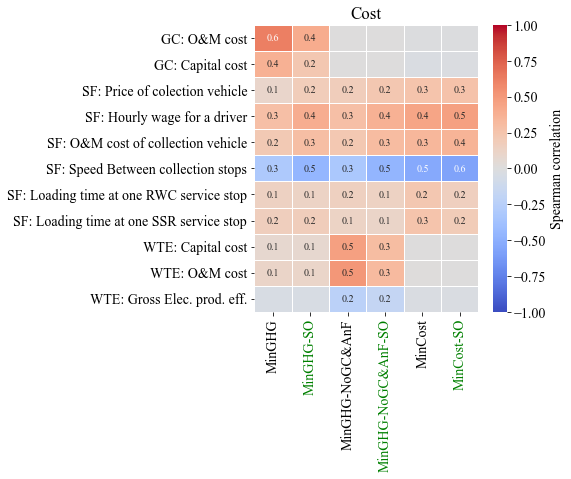

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(8, 7))

sns.heatmap(Cost_df, cmap='coolwarm', ax=ax, vmin=-1, vmax=1,
    cbar=True, linewidths=1, linecolor='w', annot=True, fmt=".1f", annot_kws={"size": 10},
    cbar_kws={'label': 'Spearman correlation'})

for t in ax.texts:
    val = eval(t.get_text())
    if val == 0.0:
        t.set_text('')
    else:
        t.set_text(str(abs(val)))
ax.set_title(impact_dict[TotCost_Method])
for t in ax.xaxis.get_ticklabels():
    if 'SO' in t.get_text():
        t.set_color('green')

tick_labels = []
for x in Cost_df.index:
    if x in param_dict:
        tick_labels.append(param_dict[x])
    else:
        tick_labels.append(x)     
ax.yaxis.set_ticklabels(tick_labels)
ax.xaxis.set_ticklabels([scenario_dict[l] for l in Cost_df.columns])

fig.tight_layout(pad=1.4)
fig.savefig('MC_Cor_res_Cost.png', dpi=300)

### Selected Impacts

In [21]:
methods_main_2 = [GWP_Method,
           CED_Method, ACID_Method, ETP_Method, SMOG_Method]
Imprnt_params = set()
corr_dict = {}
for f in files:
    data = pd.read_pickle(f)
    corr_data = data.corr(method='spearman')
    corr_data.drop(axis=0, index=methods, inplace=True)
    corr_dict[f[3:-15]] = corr_data
    for m in methods_main_2:
        corr_data.sort_values(
            by=m,
            key=lambda col: abs(col),
            ascending=False, inplace=True)
        for i, j in corr_data[m][:40].items():
            if abs(j) > 0.2:
                Imprnt_params.add(i)
Corr_Params_dict = {}
index = list(Imprnt_params)
index.sort()
for m in methods_main_2:
    Corr_Params_dict[m] = pd.DataFrame(index=index, columns=corr_dict.keys(), dtype=float)
    for k, v in corr_dict.items():
        for param in Imprnt_params:
            if param in v.index:
                Corr_Params_dict[m].loc[[param], k] = v.loc[[param], [m]].values[0][0]
            else:
                Corr_Params_dict[m].loc[[param], k] = 0.0

c:\users\msardar2\.conda\envs\dev\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


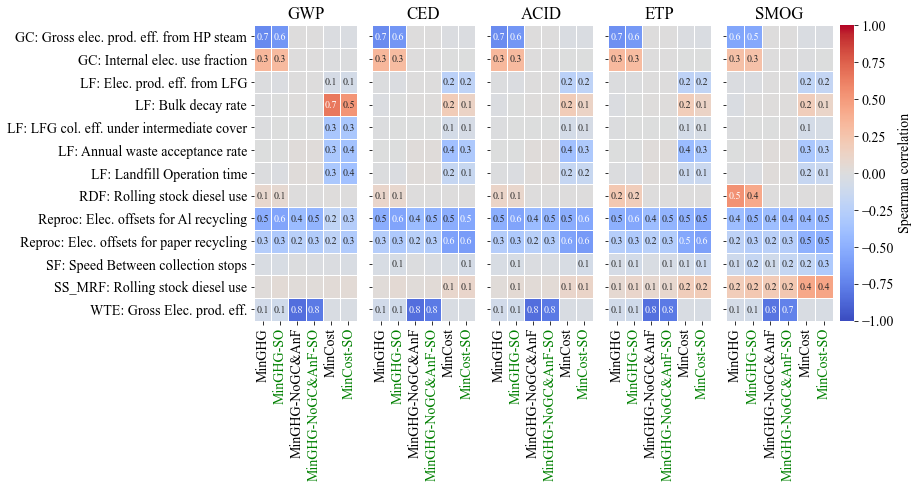

In [22]:
fig, axes= plt.subplots(1, 5, figsize=(13, 7), sharey=True, sharex=True, gridspec_kw={'width_ratios': [1, 1, 1, 1, 1.3]})

for i, m in enumerate(methods_main_2):
    if i == 4:
        sns.heatmap(Corr_Params_dict[m], cmap='coolwarm', ax=axes[i], vmin=-1, vmax=1,
            cbar=True, linewidths=1, linecolor='w', annot=True, fmt=".1f", annot_kws={"size": 10},
            cbar_kws={'label': 'Spearman correlation'})
    else:
        sns.heatmap(Corr_Params_dict[m], cmap='coolwarm', ax=axes[i], vmin=-1, vmax=1,
                    cbar=False, linewidths=1, linecolor='w', annot=True, fmt=".1f", annot_kws={"size": 10})
    for t in axes[i].texts:
        val = eval(t.get_text())
        if val == 0.0:
            t.set_text('')
        else:
            t.set_text(str(abs(val)))
    axes[i].set_title(impact_dict[m])
    for t in axes[i].xaxis.get_ticklabels():
        if 'SO' in t.get_text():
            t.set_color('green')

tick_labels = []
for x in Corr_Params_dict[m].index:
    if x in param_dict:
        tick_labels.append(param_dict[x])
    else:
        tick_labels.append(x)
        
axes[0].yaxis.set_ticklabels(tick_labels)

axes[4].xaxis.set_ticklabels([scenario_dict[l] for l in Corr_Params_dict[m].columns])


fig.tight_layout()
fig.savefig('MC_Cor_res_1.png', dpi=300)